Using Customer's data from telecom company to know if the Timely Response survey question affect the customer to Churn?

The relevant data needed for this analysis would be the [Churn] column and [Item1] column from the survey questions which represent Timely response.

Chi Square technique will be used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy import stats
%matplotlib inline
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
#load the dataset in the form of pandas dataframe
df= pd.read_csv('churn_clean.csv')

In [3]:
#Print few rows from the imported data
print(df.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [4]:
#Rename survey responses column names
df.rename(columns = {'Item1':'Timely_Responses','Item2':'Timely_Fixes', 
                           'Item3':'Timely_Replacements','Item4':'Reliability', 
                           'Item5':'Options','Item6':'Respectful_responses', 
                           'Item7':'Courteous_exchange','Item8':'Active_listening'},
                inplace=True)

In [5]:
chi_Responses= pd.crosstab(df['Churn'], df['Timely_Responses'])
print(chi_Responses)

Timely_Responses    1     2     3     4    5    6   7
Churn                                                
No                158  1002  2562  2473  994  146  15
Yes                66   391   886   885  365   53   4


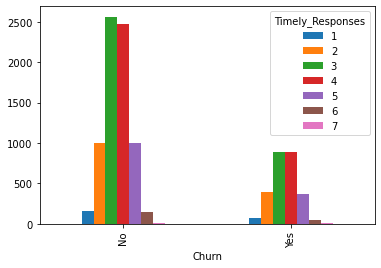

In [6]:
chi_Responses.plot(kind='bar', stacked=False)
plt.show()

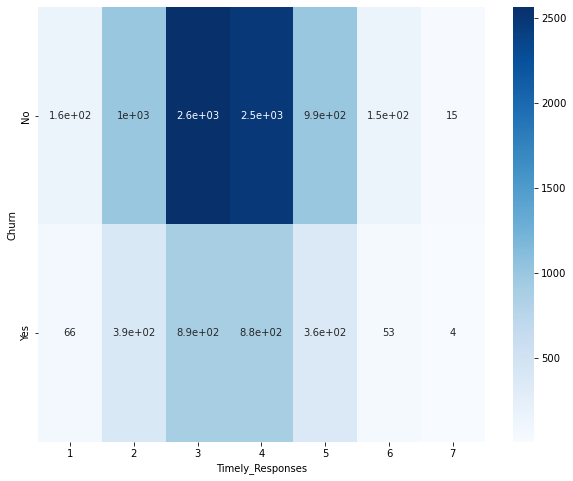

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(chi_Responses, annot=True, cmap='Blues')
plt.show()

Use chi-square to test the independence

In [8]:
stat, p, dof, expected = chi2_contingency(chi_Responses)
print(f'p-value: {p}')

p-value: 0.6318335816054494


Chi-square technique chosen to test the dependency between two categorical variables [Churn] and [Timely_Response] to determine whether the two categorical variables are likely related or not.

Continuous variables:
- Monthly Charge
- Income

Categorical variables:
- Internet Service
- Contract

Continuous Variable (Monthly Charge)

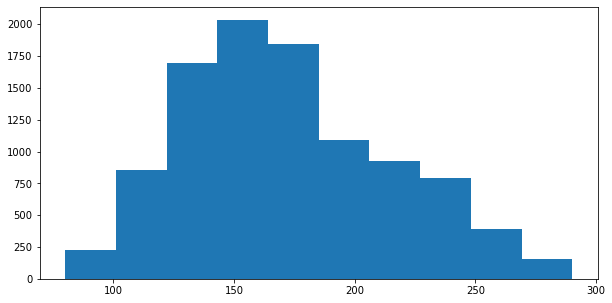

In [10]:
plt.figure(figsize=(10,5))
plt.hist(df['MonthlyCharge'])
plt.show()

Continuous Variable (Income)

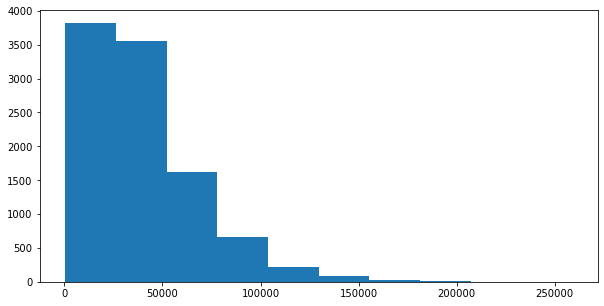

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df['Income'])
plt.show()

Categorical variables (InternetService)

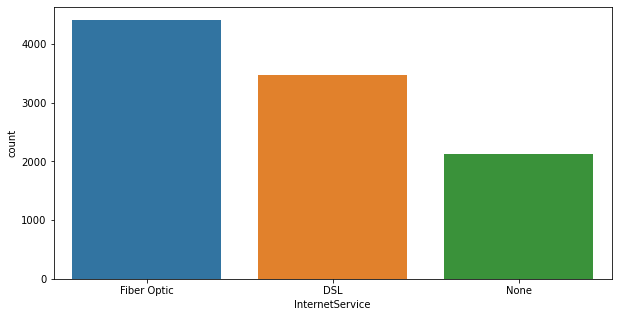

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='InternetService')
plt.show()

Categorical variables (Contract)

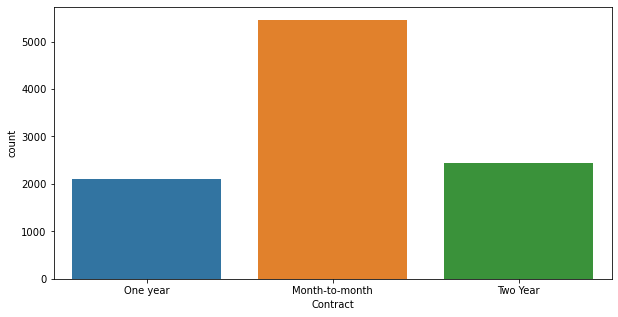

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Contract')
plt.show()

BIVARIATE STATISTICS:

Continuous variables:
- Monthly Charge
- Income

Categorical variables:
- Churn
- Multiple

Scatter plot for continuous variables Income and Monthly Charge.

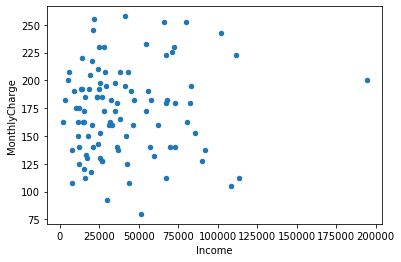

In [16]:
#scatter plot of continuous variables Income and Monthly Charge
df[df['Income'] < 250000].sample(100).plot.scatter(x='Income', y='MonthlyCharge')
plt.show()

Show categorical variables the Churn count when Multiple = Yes/No

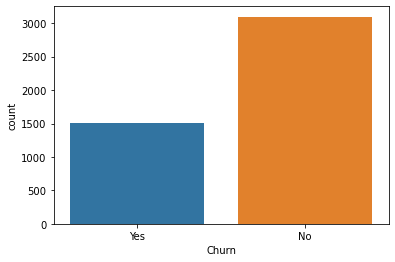

In [17]:
#Plot Churn count when Multiple = Yes
sns.countplot(data=df, x=df.loc[df['Multiple'] == 'Yes', 'Churn'])
plt.show()

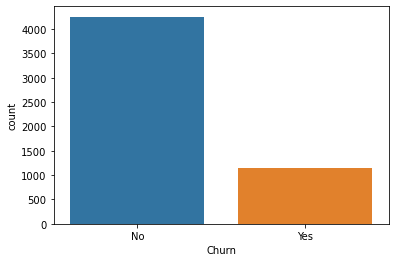

In [18]:
#Plot Churn count when Multiple = No
sns.countplot(data=df, x=df.loc[df['Multiple'] == 'No', 'Churn'])
plt.show()

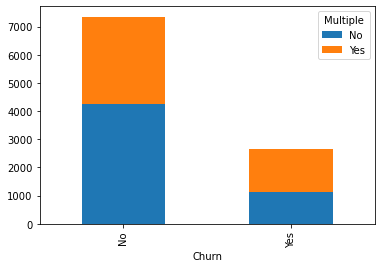

In [19]:
#stacked chart to show relationship between Churn and Multiple 
df_Bivariate = pd.pivot_table(df.groupby(['Churn','Multiple']).size().reset_index(),values=0,
                              index='Churn',columns=['Multiple'],aggfunc=np.sum)
df_Bivariate.plot(kind='bar',stacked=True)
plt.show()

RESULTS OF ANALYSIS:

The p-value result from the chi-square test = 0.6318335816054494 and with 0.05 alpha value, we cannot reject the null hypothesis. Given this result, there is no relationship between the response time survey question results and the customer decision whether to churn or not.

LIMITATIONS OF ANALYSIS:
    
- With the consideration of the high p-value the effect of the independent variable might exist, but the limitation of the sample data isn’t enough to gather meaningful information.
- Further analysis and gathering more data are required.

RECOMMENDED COURSE OF ACTION:

As the response to the customer in a timely manner seems to be important but the result of the analysis indicates the need for more data exploration and to continue to analyze different variables to find other insights that can help decision-makers to take the right decision.